In [1]:
# 0_1. Load keras package needed
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

/home/shr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 0_2. Fix random seed
np.random.seed(3)

In [33]:
# 1_1. Creating Datasets
# Load MNIST dataset from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print ( "Initial train data shape is",x_train.shape, "Initial train label shape is", y_train.shape)

Initial train data shape is (60000, 28, 28) Initial train label shape is (60000,)


In [ ]:
# Reshape dataset to model input shape 
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
print ( "Converted train data shape is",x_train.shape)
# Reshape label to one-hat shape for classification problem 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print ("Converted train label shape is", y_train.shape)

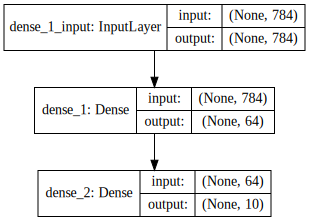

In [5]:
# 2_1. Buliding a Model
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu')) # First layer with input shape
model.add(Dense(units=10, activation='softmax')) # Second layer with sofrmax activation function

# Model Architecture Visualization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
# 1_2. Creating Datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print ( "Initial train data shape is",x_train.shape, "Initial train label shape is", y_train.shape)

In [ ]:
# Reshape dataset to model input shape 
x_train = x_train.reshape(60000, 28, 28,1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28,1).astype('float32') / 255.0
print ( "Converted train data shape is",x_train.shape)
# Reshape label to one-hat shape for classification problem 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print ("Converted train label shape is", y_train.shape)

In [ ]:
# 2_2. Buliding a Model with Convolutional layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))  # First Convolutional layer with input shape 
model.add(Conv2D(64, (3, 3), activation='relu')) # Second Convolutional layer 
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling layer
model.add(Flatten())  # Flatten layer for converting CNN codes to Dense layer input 
model.add(Dense(128, activation='relu')) # hidden Dense layer
model.add(Dense(10, activation='softmax')) # Activation layer with sofrmax

# Model Architecture Visualization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
# 3. Setting up the Model Learning Process
# Define optimizer for training
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# Compiling sequential model with optimizer
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [8]:
# 4. Training the Model
hist = model.fit(x_train, y_train, batch_size=32, validation_split=0.2, shuffle=True, nb_epoch=10)

/home/shr/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.8283 - acc: 0.7886 - val_loss: 0.3996 - val_acc: 0.8999
Epoch 2/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.3700 - acc: 0.9017 - val_loss: 0.3092 - val_acc: 0.9174
Epoch 3/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.3087 - acc: 0.9148 - val_loss: 0.2740 - val_acc: 0.9253
Epoch 4/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.2770 - acc: 0.9230 - val_loss: 0.2531 - val_acc: 0.9294
Epoch 5/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.2537 - acc: 0.9291 - val_loss: 0.2348 - val_acc: 0.9356
Epoch 6/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.2349 - acc: 0.9337 - val_loss: 0.2198 - val_acc: 0.9395
Epoch 7/10
48000/48000 [==============================] - 3s 53us/step - loss: 0.2194 - acc: 0.9382 - val_loss: 0.2089 - val_acc

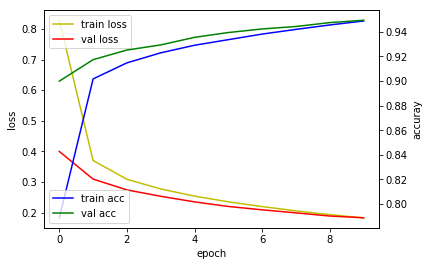

In [9]:
# 5. Confirm the Learning Process
# by mathplot model training history can be visualized
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [10]:
# 6. Evaluating the Model
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('evaluation loss and acc')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 22us/step
evaluation loss and acc
[0.1807783282607794, 0.9472]


In [31]:
# 7. Using the Model

from keras.models import load_model

model.save('mnist_mlp_model.h5')

from keras.models import load_model

model = load_model('mnist_mlp_model.h5')

xhat = x_test[0:1]
print(y_test[0:1])
yhat = model.predict_classes(xhat)
yhatp = model.predict(xhat)
print('predicted class')
print(yhat)
print('class probabilty is')
print(yhatp)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
predicted class
[7]
class probabilty is
[[6.0878265e-05 2.1356923e-08 2.7028471e-04 4.5518465e-03 2.1329497e-07
  5.0951239e-05 3.4084209e-09 9.9483889e-01 1.4073811e-05 2.1281923e-04]]
